# Setup

In [39]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import (
    Dense,
    Flatten,
    Dropout,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
# from keras.optimizers import SGD
from tensorflow.compat.v1.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Parameters for Model Training

In [6]:
batch_size = 32  # Number of samples per gradient update
num_classes = 10  # Total number of classes in the dataset
epochs = 100  # Number of epochs to train the model
data_augmentation = True  # Flag to determine whether to use data augmentation

# Load and Preprocess the CIFAR-10 Dataset

In [7]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 115s 1us/step


# Exploratory Data Analysis (EDA)

In [8]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

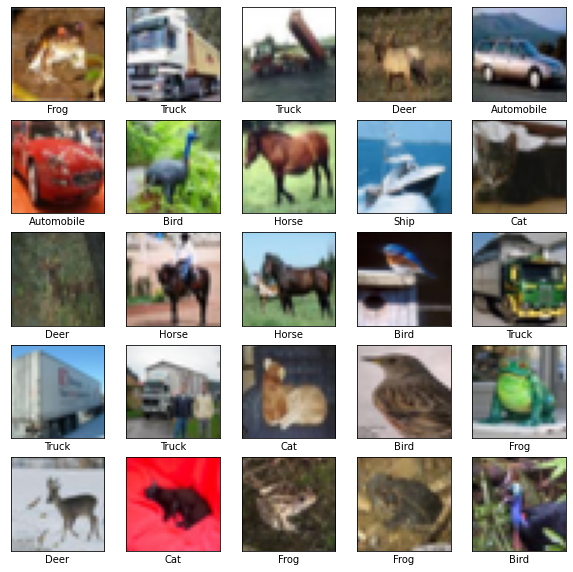

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

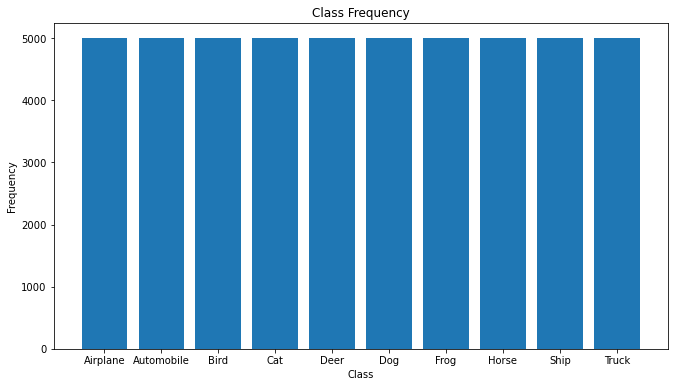

In [10]:
# Bar chart showing distribution of classes in training set
plt.figure(figsize=(11, 6))
unique, counts = np.unique(train_y, return_counts=True)

plt.bar(unique, counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique, class_names)
plt.show()

# Preprocess the Data with One-Hot Encoding

In [11]:
# Convert class vectors to binary class matrices
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

In [12]:
# Normalize pixel values to the range [0, 1]to aid in training convergence
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

# Define the CNN model

In [13]:
def define_model():
    model = Sequential()
    # First convolutional block with 32 filters, batch normalization, and dropout for regularization
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(32, 32, 3),
        )
    )
    model.add(BatchNormalization())
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Second convolutional block with increased filter size for more complex feature extraction
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Third convolutional block with further increased filter size
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Flatten the output from the convolutional layers before passing to the dense layer
    model.add(Flatten())
    # Dense layer for classification
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation="softmax"))

    # Compile the model with legacy SGD optimizer and categorical crossentropy loss function
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and Compile the Model

In [14]:
model = define_model()

2024-02-21 11:42:07.888898: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Configure Data Augmentation

In [15]:
if data_augmentation:
    print("Using real-time data augmentation.")
    datagen = ImageDataGenerator(
        width_shift_range=0.1,  # Randomly shift images horizontally
        height_shift_range=0.1,  # Randomly shift images vertically
        horizontal_flip=True,  # Randomly flip images horizontally
    )
    # Compute quantities required for feature-wise normalization
    datagen.fit(train_x)

Using real-time data augmentation.


# Train the Model

In [16]:
if not data_augmentation:
    print("Not using data augmentation.")
    history = model.fit(
        train_x,
        train_y,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(test_x, test_y),
        shuffle=True,
    )
else:
    # Fit the model on the batches generated by datagen.flow()
    history = model.fit(
        datagen.flow(train_x, train_y, batch_size=batch_size),
        epochs=epochs,
        validation_data=(test_x, test_y),
        workers=4,
    )

Epoch 1/100
1563/1563 [==============================] - 56s 35ms/step - loss: 1.9281 - accuracy: 0.3353 - val_loss: 1.4730 - val_accuracy: 0.4488
Epoch 2/100
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5182 - accuracy: 0.4425 - val_loss: 1.5659 - val_accuracy: 0.4286
Epoch 3/100
1563/1563 [==============================] - 56s 35ms/step - loss: 1.4051 - accuracy: 0.4877 - val_loss: 1.5161 - val_accuracy: 0.4456
Epoch 4/100
1563/1563 [==============================] - 56s 35ms/step - loss: 1.3176 - accuracy: 0.5257 - val_loss: 1.3358 - val_accuracy: 0.5126
Epoch 5/100
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2370 - accuracy: 0.5572 - val_loss: 1.3151 - val_accuracy: 0.5361
Epoch 6/100
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1781 - accuracy: 0.5797 - val_loss: 1.1408 - val_accuracy: 0.5827
Epoch 7/100
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1352 - accuracy: 0.5984 - val_loss: 1

# Evaluate the Model's Performance on the Test Set

In [17]:
scores = model.evaluate(test_x, test_y, verbose=1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.4210 - accuracy: 0.8607
Test loss: 0.4209668040275574
Test accuracy: 0.8607000112533569


# Generate Predictions for Test Set

In [18]:
predictions = model.predict(test_x)

313/313 [==============================] - 4s 12ms/step


# Generate a Confusion Matrix and Classification Report to Evaluate the Model's Performance

In [19]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_y, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

Confusion Matrix
[[884  14  24   3   4   1   8   9  44   9]
 [  2 963   2   0   2   0   3   0  10  18]
 [ 28   0 806  17  42  15  72  12   5   3]
 [ 21   3  36 663  45  75 111  22  12  12]
 [  7   2  28  19 856   6  60  17   5   0]
 [  9   2  23 115  29 722  55  41   3   1]
 [  3   1  11   9   1   2 969   2   1   1]
 [  9   0  11  13  26  10  14 914   1   2]
 [ 31  11   4   2   1   1   4   0 940   6]
 [ 18  65   4   3   1   1   5   4   9 890]]
Classification Report
              precision    recall  f1-score   support

    Airplane       0.87      0.88      0.88      1000
  Automobile       0.91      0.96      0.93      1000
        Bird       0.85      0.81      0.83      1000
         Cat       0.79      0.66      0.72      1000
        Deer       0.85      0.86      0.85      1000
         Dog       0.87      0.72      0.79      1000
        Frog       0.74      0.97      0.84      1000
       Horse       0.90      0.91      0.90      1000
        Ship       0.91      0.94      0.93

# Plot Training and Validation Accuracy and Loss to Visualize the Model's Learning Over Time

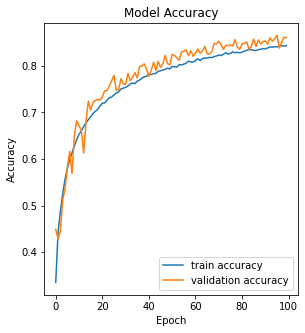

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

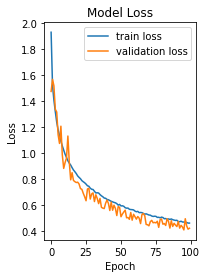

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

4/4 [==============================] - 0s 9ms/step


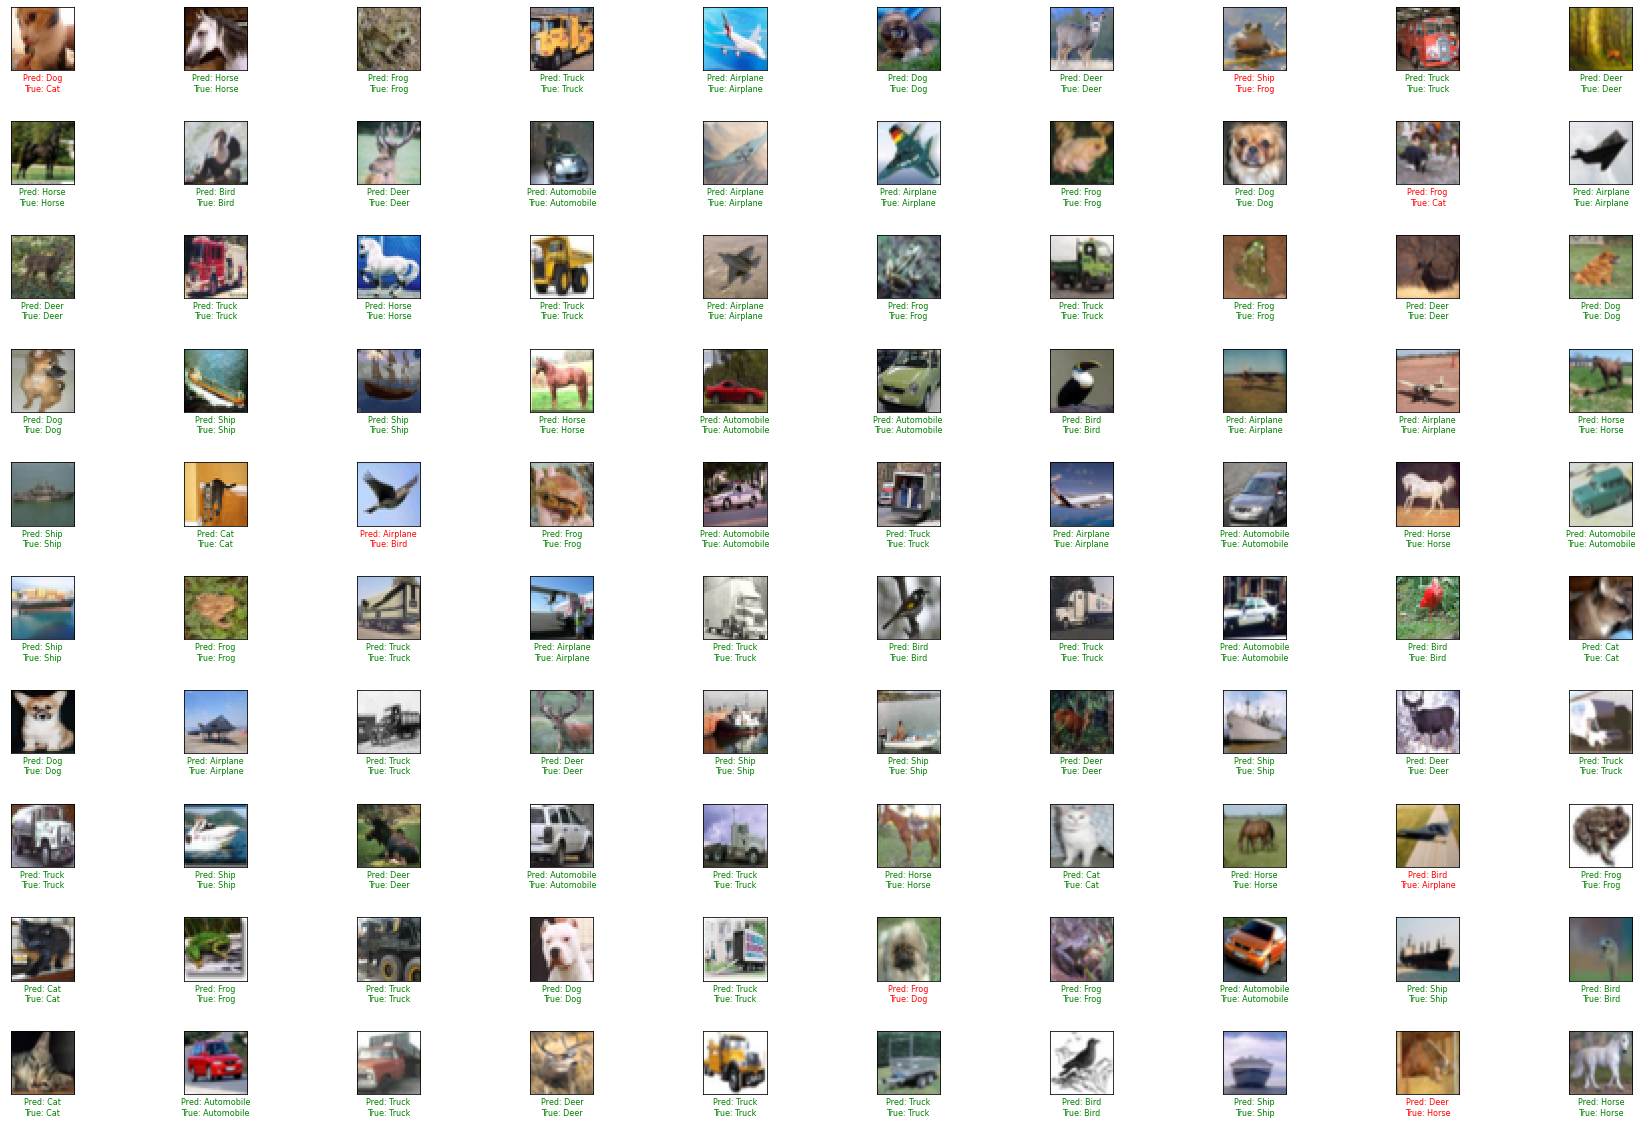

Accuracy for the random subset of 100 images: 93.0 %
Accuracy for the random subset of 100 images: 93.0 %


In [36]:
# Generate random indices for the first 100 test images
random_indices = random.sample(range(len(test_x)), 100)

# Generate Predictions for the Random Subset of Test Set Images
predictions_random_100 = model.predict(test_x[random_indices])

# Convert predictions to class labels
predicted_classes_random_100 = np.argmax(predictions_random_100, axis=1)

# Calculate accuracy for the random subset of 100 images
correct_predictions_random_100 = np.sum(predicted_classes_random_100 == true_classes[random_indices])
total_samples_random_100 = 100
accuracy_random_100 = correct_predictions_random_100 / total_samples_random_100 * 100

# Display the first 100 test images with their true and predicted labels
plt.figure(figsize=(30, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.8)  # Adjust the space between subplots (increase hspace)

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax.imshow(test_x[random_indices[i]], cmap=plt.cm.binary, aspect='equal')
    predicted_label = class_names[predicted_classes_random_100[i]]
    true_label = class_names[true_classes[random_indices[i]]]
    color = 'green' if predicted_classes_random_100[i] == true_classes[random_indices[i]] else 'red'
    plt.xlabel(f'Pred: {predicted_label}\nTrue: {true_label}', color=color, fontsize=8)  # Adjust fontsize if needed

plt.show()

print("Accuracy for the random subset of 100 images:", accuracy_random_100, "%")


In [42]:
tf.saved_model.save(model, '/home/dmiller/code/CPSC542/CPSC542-cifar-Assignment1_')

INFO:tensorflow:Assets written to: /home/dmiller/code/CPSC542/CPSC542-cifar-Assignment1_/assets


INFO:tensorflow:Assets written to: /home/dmiller/code/CPSC542/CPSC542-cifar-Assignment1_/assets
